If code can't perform correctly, try delete # and Run All again :)

In [1]:
!pip install pandas
!pip install -U scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\LIKHIT\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 1.7 MB/s eta 0:00:06
     -                                        0.3/9.2 MB 3.5 MB/s eta 0:00:03
     --                                       0.5/9.2 MB 4.2 MB/s eta 0:00:03
     ---                                      0.8/9.2 MB 4.6 MB/s eta 0:00:02
     ----                                     1.1/9.2 MB 4.9 MB/s eta 0:00:02
     -----                                    1.4/9.2 MB 5.1 MB/s eta 0:00:02
     ------                                   1.6/9.2 MB 5.1 MB/s eta 0:00:02
     --------                                 1.9/9.2 MB 5.2 MB/s eta 0:00:02
     ---------                                2.1/9.2 MB 5.2 MB/s eta 0:00:02
     ----------                               2.4/9.2 MB 5.3 MB/s eta 0:00:02
     -----------                              2.7/9.2 MB 5.4 MB/s eta 0:00:02
     ------------                             2.9/9.2 MB 5.3 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\LIKHIT\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

Member_Metrics = "_Temp_Member_RFM_202306221359.csv"

mm = pd.read_csv(Member_Metrics)


In [3]:
print(mm.shape)
print(mm)


(523472, 12)
              MEMBER_ID  total_sales  member_txns  member_QTYs last_purch_dt  \
0       LM0007042794690        531.0            1            1    2022-04-16   
1       LM0007044222702        531.0            1            1    2022-12-27   
2       LM1021190005797        531.0            1            1    2022-11-10   
3       LM0007042741045        531.0            1            1    2022-05-29   
4       LM0007043004064        531.0            1            1    2022-09-16   
...                 ...          ...          ...          ...           ...   
523467  LM0007044213793        841.5            1            1    2022-10-31   
523468       LM*0301469        841.5            1            1    2022-11-01   
523469       LM*0318170        841.5            1            1    2022-11-17   
523470       LM*0308074        841.5            1            1    2022-11-07   
523471       LM*0310950        841.5            1            1    2022-11-10   

          ATV  recency  r_

In [4]:
mm.describe()

,total_sales,member_txns,member_QTYs,ATV,recency,r_score,f_score,m_score,RFM_Score
count,5.234720e+05,523472.000000,523472.000000,523472.000000,523472.000000,523472.000000,523472.000000,523472.000000,523472.000000
mean,1.114895e+04,4.209253,10.075442,2419.919189,98.341298,2.999992,2.999992,2.999992,332.999152
std,3.581324e+04,11.100405,57.647551,1943.715022,101.313252,1.414218,1.414218,1.414218,147.378141
min,-1.730000e+03,0.000000,-3.000000,-1685.000000,0.000000,1.000000,1.000000,1.000000,111.000000
25%,2.092500e+03,1.000000,2.000000,1360.417500,19.000000,2.000000,2.000000,2.000000,221.000000
50%,4.383000e+03,2.000000,4.000000,1997.500000,55.000000,3.000000,3.000000,3.000000,331.000000
75%,1.052500e+04,5.000000,10.000000,2885.787500,160.000000,4.000000,4.000000,4.000000,454.000000
max,5.640321e+06,1811.000000,13718.000000,196388.000000,364.000000,5.000000,5.000000,5.000000,555.000000


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Calculate RFM metrics
recency = mm['recency']
frequency = mm['member_txns']
monetary = mm['total_sales']

# Create a new DataFrame with RFM metrics
rfm_df = pd.DataFrame({'Member_ID': mm['MEMBER_ID'], 'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# Drop rows with NaN values in every column
rfm_df = rfm_df.dropna(how='all')

print(rfm_df)


              Member_ID  Recency  Frequency  Monetary
0       LM0007042794690      259          1     531.0
1       LM0007044222702        4          1     531.0
2       LM1021190005797       51          1     531.0
3       LM0007042741045      216          1     531.0
4       LM0007043004064      106          1     531.0
...                 ...      ...        ...       ...
523467  LM0007044213793       61          1     841.5
523468       LM*0301469       60          1     841.5
523469       LM*0318170       44          1     841.5
523470       LM*0308074       54          1     841.5
523471       LM*0310950       51          1     841.5

[523472 rows x 4 columns]


In [9]:
level = ['Low', 'Mid-Low', 'Mid', 'Mid-High', 'High']

# Assign bin labels to the DataFrame
rfm_segments = pd.qcut(rfm_df['Recency'], q=len(level), labels=level, duplicates='drop')
rfm_df['R'] = rfm_segments.values
rfm_df['R_Score'] = rfm_segments.cat.codes + 1

rfm_segments = pd.qcut(rfm_df['Frequency'], q=len(level)+1, labels=level, duplicates='drop')
rfm_df['F'] = rfm_segments.values
rfm_df['F_Score'] = rfm_segments.cat.codes + 1

rfm_segments = pd.qcut(rfm_df['Monetary'], q=len(level), labels=level)
rfm_df['M'] = rfm_segments.values
rfm_df['M_Score'] = rfm_segments.cat.codes + 1

print(rfm_df)


              Member_ID  Recency  Frequency  Monetary         R  R_Score    F  \
0       LM0007042794690      259          1     531.0      High        5  Low   
1       LM0007044222702        4          1     531.0       Low        1  Low   
2       LM1021190005797       51          1     531.0       Mid        3  Low   
3       LM0007042741045      216          1     531.0      High        5  Low   
4       LM0007043004064      106          1     531.0  Mid-High        4  Low   
...                 ...      ...        ...       ...       ...      ...  ...   
523467  LM0007044213793       61          1     841.5       Mid        3  Low   
523468       LM*0301469       60          1     841.5       Mid        3  Low   
523469       LM*0318170       44          1     841.5       Mid        3  Low   
523470       LM*0308074       54          1     841.5       Mid        3  Low   
523471       LM*0310950       51          1     841.5       Mid        3  Low   

        F_Score    M  M_Sco

In [10]:
from sklearn.cluster import KMeans

centroids = np.array([
    [4.5, 4.5, 4.5],       # Champion
    [3.5, 4, 4],           # Loyal
    [3.5, 3.5, 3.5],       # Need Attention
    [4, 3, 2.5],           # Potential Loyalist
    [4.5, 1.5, 2.5],       # Promising
    [4, 1, 1.5],           # Recent Customer
    [1.5, 3.5, 3.5],       # At Risk
    [1, 3, 3.5],           # Cannot Lose Them
    [1.5, 2, 2],           # Hibernating
    [2.5, 1.5, 1.5],       # About To Sleep
    [1, 1.5, 1.5]          # Lost
])

cluster_name = {
    0: 'Champions',
    1: 'Loyal',
    2: 'Need Attention',
    3: 'Potential Loyalists',
    4: 'Promising',
    5: 'Recent Customer',
    6: 'At Risk',
    7: 'Cannot Lose Them',
    8: 'Hibernating customers',
    9: 'About To Sleep',
    10: 'Lost'
}

rfm_scores_df = rfm_df[['R_Score', 'F_Score', 'M_Score']]
kmeans = KMeans(n_clusters=11, init=centroids, n_init=1, random_state=42)
kmeans.fit(rfm_scores_df)  # Replace `your_data` with your actual data

# Add cluster labels to the rfm_df DataFrame
rfm_df['Cluster'] = kmeans.labels_

# Map cluster labels to comments
rfm_df['RFM_Segment'] = rfm_df['Cluster'].map(cluster_name)

# Calculate RFM Score as the sum of R_Score, F_Score, and M_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']

# Display the result
print(rfm_df[['Member_ID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score']])
final_centroids = kmeans.cluster_centers_

# Map cluster centers to RFM segments
final_segments = []
for centroid in final_centroids:
    closest_segment = min(cluster_name.keys(), key=lambda x: np.linalg.norm(centroid - centroids[x]))
    final_segments.append(cluster_name[closest_segment])

# Add RFM_Segment to the final_centroids
final_centroids = np.column_stack((final_centroids, final_segments))
print(final_centroids)

# Save new dataset as csv
rfm_df[['Member_ID', 'Recency',  'Frequency',  'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment']].to_csv('rfm_segment.csv', index=True)


              Member_ID  R_Score  F_Score  M_Score      RFM_Segment  RFM_Score
0       LM0007042794690        5        1        1  Recent Customer          7
1       LM0007044222702        1        1        1             Lost          3
2       LM1021190005797        3        1        1   About To Sleep          5
3       LM0007042741045        5        1        1  Recent Customer          7
4       LM0007043004064        4        1        1  Recent Customer          6
...                 ...      ...      ...      ...              ...        ...
523467  LM0007044213793        3        1        1   About To Sleep          5
523468       LM*0301469        3        1        1   About To Sleep          5
523469       LM*0318170        3        1        1   About To Sleep          5
523470       LM*0308074        3        1        1   About To Sleep          5
523471       LM*0310950        3        1        1   About To Sleep          5

[523472 rows x 6 columns]
[['4.24071123574035' '4.3

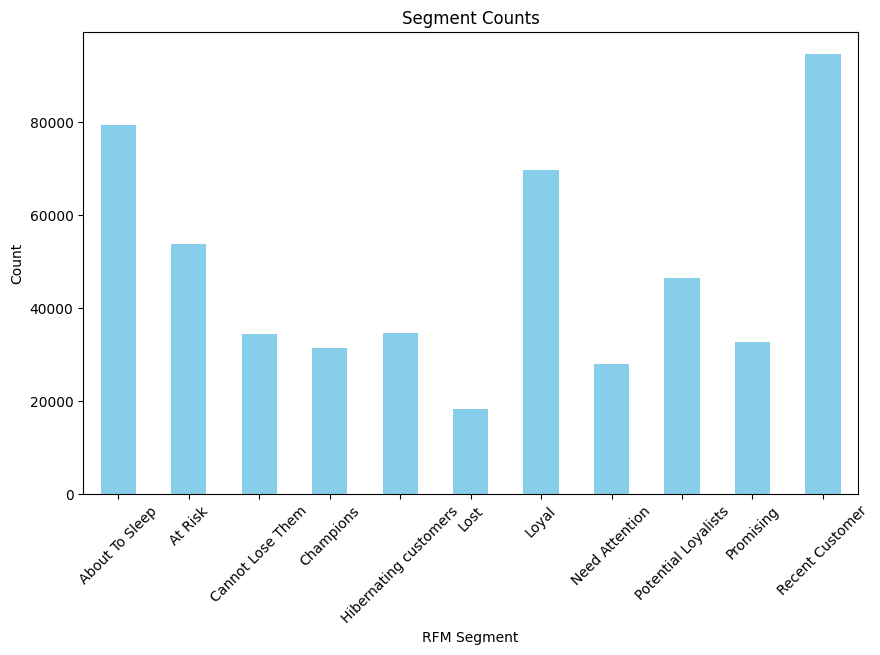

In [11]:
# Plot the count of each segment class
segment_counts = rfm_df['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Segment Counts')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the 'Recency', 'Frequency', and 'Monetary' columns
rfm_df_normalized = rfm_df.copy()
rfm_df_normalized[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_df_normalized[['Recency', 'Frequency', 'Monetary']])
rfm_df_normalized[['Member_ID', 'Recency',  'Frequency',  'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment']].to_csv('rfm_segment_normalized.csv', index=True)

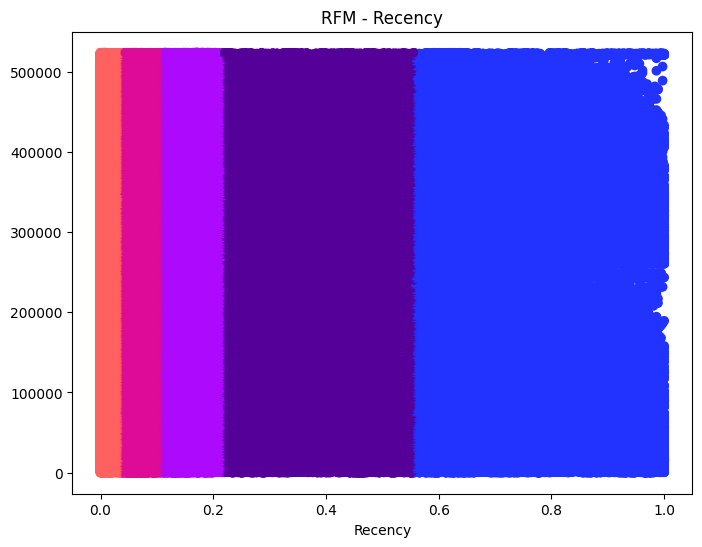

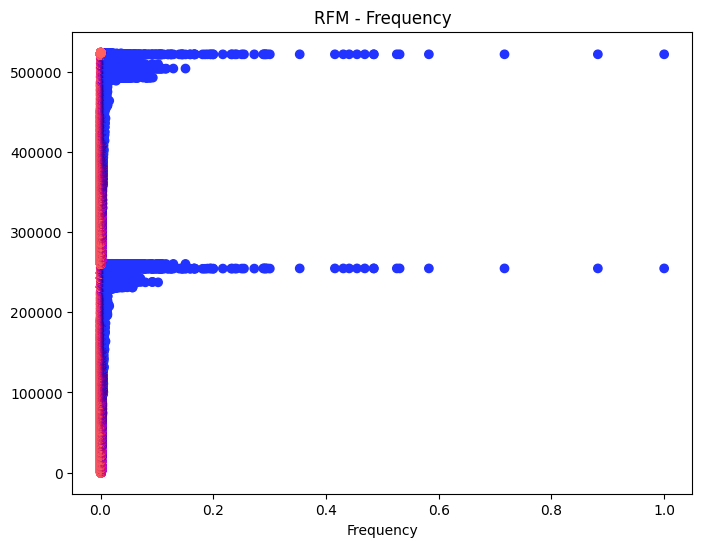

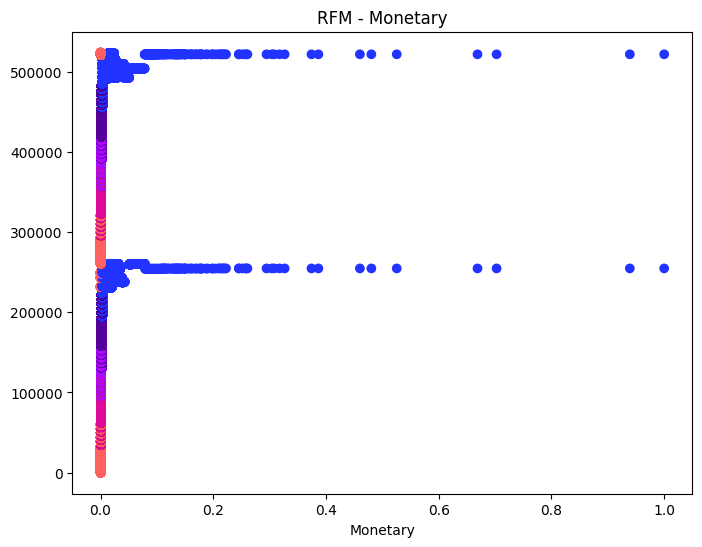

In [13]:
individual_segment = {
    'High': "#2233FF",
    'Mid-High': "#550099",
    'Mid': "#AD0AFD",
    'Mid-Low': "#DD0B98",
    'Low': "#FF6060"
}

# Plot Recency with individual segment colors
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df_normalized['Recency'], rfm_df_normalized.index, c=rfm_df_normalized['R'].map(individual_segment))
plt.xlabel('Recency')
plt.title('RFM - Recency')
plt.show()

# Plot Frequency with individual segment colors
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df_normalized['Frequency'], rfm_df_normalized.index, c=rfm_df_normalized['F'].map(individual_segment))
plt.xlabel('Frequency')
plt.title('RFM - Frequency')
plt.show()

# Plot Monetary with individual segment colors
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df_normalized['Monetary'], rfm_df_normalized.index, c=rfm_df_normalized['M'].map(individual_segment))
plt.xlabel('Monetary')
plt.title('RFM - Monetary')
plt.show()


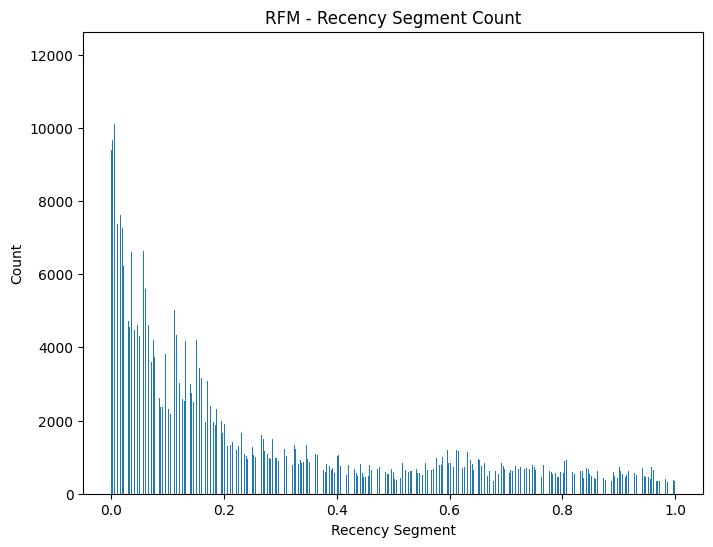

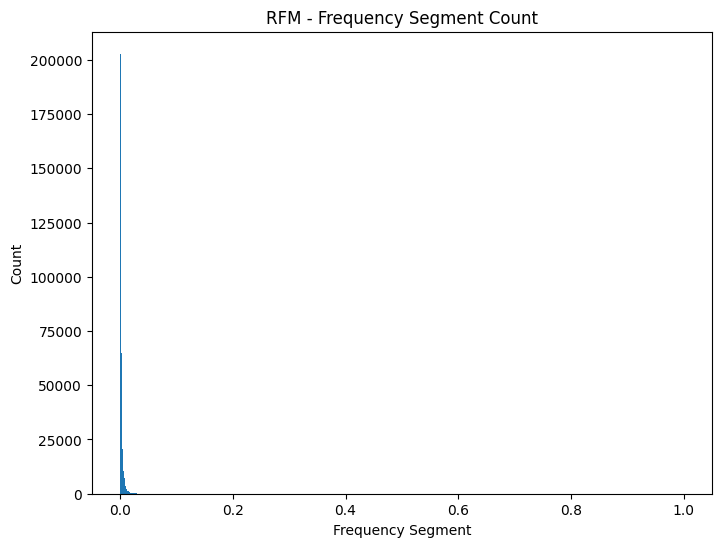

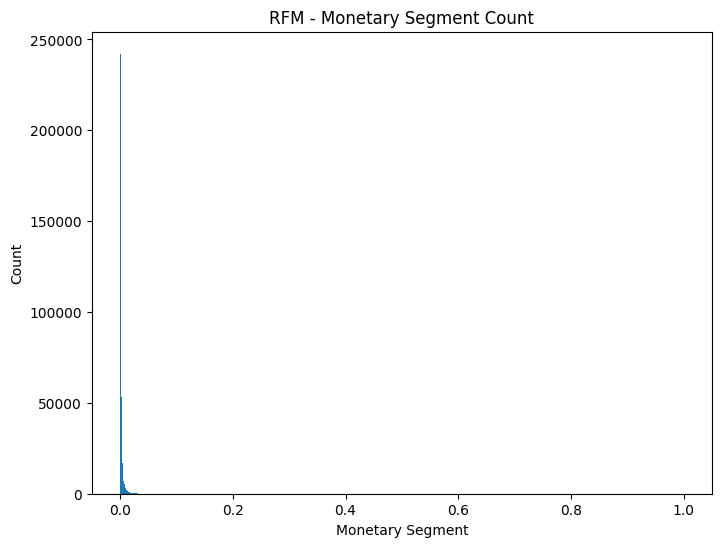

In [14]:
import matplotlib.pyplot as plt

# Number of bins for the histograms
num_bins = 1000

# Plot the histogram for Recency
plt.figure(figsize=(8, 6))
plt.hist(rfm_df_normalized['Recency'], bins=num_bins)
plt.xlabel('Recency Segment')
plt.ylabel('Count')
plt.title('RFM - Recency Segment Count')
plt.show()

# Plot the histogram for Frequency
plt.figure(figsize=(8, 6))
plt.hist(rfm_df_normalized['Frequency'], bins=num_bins)
plt.xlabel('Frequency Segment')
plt.ylabel('Count')
plt.title('RFM - Frequency Segment Count')
plt.show()

# Plot the histogram for Monetary
plt.figure(figsize=(8, 6))
plt.hist(rfm_df_normalized['Monetary'], bins=num_bins)
plt.xlabel('Monetary Segment')
plt.ylabel('Count')
plt.title('RFM - Monetary Segment Count')
plt.show()


In [15]:
percentiles = np.arange(0, 1, 0.00001)

# R count-percentile dataframe
counts_R = np.array([np.sum(rfm_df_normalized['Recency'] <= percentile) for percentile in percentiles])

# F count-percentile dataframe
counts_F = np.array([np.sum(rfm_df_normalized['Frequency'] <= percentile) for percentile in percentiles])

# M count-percentile dataframe
counts_M = np.array([np.sum(rfm_df_normalized['Monetary'] <= percentile) for percentile in percentiles])

# Save count-percentile data to a single file
RFM_count_percentile = pd.DataFrame({'Normalized_value': percentiles, 'R_Count': counts_R, 'F_Count': counts_F, 'M_Count': counts_M})


In [ ]:
max = (rfm_df_normalized.index.max()+1)

# Add normalized count columns
RFM_count_percentile['R_percentile'] = RFM_count_percentile['R_Count'] / max
RFM_count_percentile['F_percentile'] = RFM_count_percentile['F_Count'] / max
RFM_count_percentile['M_percentile'] = RFM_count_percentile['M_Count'] / max

# Save updated count-percentile data to a single file
RFM_count_percentile.to_csv('RFM_count_percentile.csv', index=False)

In [ ]:
# Calculate the differences between consecutive percentiles
diff_R = np.diff(RFM_count_percentile['R_percentile'])
diff_F = np.diff(RFM_count_percentile['F_percentile'])
diff_M = np.diff(RFM_count_percentile['M_percentile'])

# Find the index of the highest change
max_change_index_R = np.argmax(diff_R)
max_change_index_F = np.argmax(diff_F)
max_change_index_M = np.argmax(diff_M)

# Get the highest change values for each variable
max_change_R = diff_R[max_change_index_R]
max_change_F = diff_F[max_change_index_F]
max_change_M = diff_M[max_change_index_M]

# Get the first row values
initial_change_R = RFM_count_percentile['R_percentile'][0]
initial_change_F = RFM_count_percentile['F_percentile'][0]
initial_change_M = RFM_count_percentile['M_percentile'][0]

# Check if the highest change values are lower than the initial change values
if max_change_R < initial_change_R:
    max_change_R = initial_change_R
    max_change_index_R = 0

if max_change_F < initial_change_F:
    max_change_F = initial_change_F
    max_change_index_F = 0

if max_change_M < initial_change_M:
    max_change_M = initial_change_M
    max_change_index_M = 0
    
try:
    cutoff_index_R = max_change_index_R - np.where(RFM_count_percentile['R_percentile'][:max_change_index_R] == RFM_count_percentile['R_percentile'][max_change_index_R])[0][-1]
except IndexError:
    cutoff_index_R = max_change_index_R

try:
    cutoff_index_F = max_change_index_F - np.where(RFM_count_percentile['F_percentile'][:max_change_index_F] == RFM_count_percentile['F_percentile'][max_change_index_F])[0][-1]
except IndexError:
    cutoff_index_F = max_change_index_F

try:
    cutoff_index_M = max_change_index_M - np.where(RFM_count_percentile['M_percentile'][:max_change_index_M] == RFM_count_percentile['M_percentile'][max_change_index_M])[0][-1]
except IndexError:
    cutoff_index_M = max_change_index_M
    
# Print the highest change values and their corresponding percentiles
print("Highest change in R:")
print("Normalized_value: ", RFM_count_percentile['Normalized_value'][max_change_index_R])
print("Percentile: ", RFM_count_percentile['R_percentile'][max_change_index_R])
print("Change value: ", max_change_R)

print("\nHighest change in F:")
print("Normalized_value: ", RFM_count_percentile['Normalized_value'][max_change_index_F])
print("Percentile: ", RFM_count_percentile['F_percentile'][max_change_index_F])
print("Change value: ", max_change_F)

print("\nHighest change in M:")
print("Normalized_value: ", RFM_count_percentile['Normalized_value'][max_change_index_M])
print("Percentile: ", RFM_count_percentile['M_percentile'][max_change_index_M])
print("Change value: ", max_change_M)


In [ ]:
# Check if the index is 0 and assign a value of 0 to the percentile
percentile_R = RFM_count_percentile['R_percentile'][cutoff_index_R - 1] if cutoff_index_R > 0 else 0
percentile_F = RFM_count_percentile['F_percentile'][cutoff_index_F - 1] if cutoff_index_F > 0 else 0
percentile_M = RFM_count_percentile['M_percentile'][cutoff_index_M - 1] if cutoff_index_M > 0 else 0

# Print the percentiles of R, F, and M
print("Lower bound cutoff Percentile of R: ", percentile_R)
print("Lower bound cutoff Percentile of F: ", percentile_F)
print("Lower bound cutoff Percentile of M: ", percentile_M)


In [ ]:
# Plot R count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['R_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('R_Count')
plt.title('R: Count vs Normalized Value')
plt.show()

# Plot F count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['F_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('F_Count')
plt.title('F: Count vs Normalized Value')
plt.show()

# Plot M count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['M_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('M_Count')
plt.title('M: Count vs Normalized Value')
plt.show()

In [ ]:
segment_colors = {
    'Champions': '#00FFFF',                 # Cyan
    'Loyal': '#FF00FF',                     # Magenta
    'Potential Loyalists': '#FFFF00',       # Yellow
    'Recent Customer': '#FFA500',           # Orange
    'Promising': '#00FF00',                 # Lime
    'Need Attention': '#800080',            # Purple
    'About To Sleep': '#00CED1',            # Dark Turquoise
    'At Risk': '#FF4500',                   # Orange Red
    'Cannot Lose Them': '#FF69B4',          # Hot Pink
    'Hibernating customers': '#FF8C00',     # Dark Orange
    'Lost': '#FF0000',                      # Red
    'Other': '#808080'                      # Gray
}

# Frequency vs. Recency scatter plot
plt.figure(figsize=(10, 6))
for segment, color in segment_colors.items():
    segment_data = rfm_df_normalized[rfm_df_normalized['RFM_Segment'] == segment]
    plt.scatter(segment_data['Frequency'], segment_data['Recency'], c=color, label=segment)

plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('Frequency vs. Recency')
plt.legend()
plt.show()

# Monetary vs. Recency scatter plot
plt.figure(figsize=(10, 6))
for segment, color in segment_colors.items():
    segment_data = rfm_df_normalized[rfm_df_normalized['RFM_Segment'] == segment]
    plt.scatter(segment_data['Monetary'], segment_data['Recency'], c=color, label=segment)

plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('Monetary vs. Recency')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Iterate over each centroid
for centroid in final_centroids:
    r_score, f_score, m_score, segment = centroid
    
    # Convert the centroid values to float
    r_score = float(r_score)
    f_score = float(f_score)
    m_score = float(m_score)
    
    # Convert the segment value to a string
    segment = str(segment)
    
    # Assign the color based on the segment label using the segment_colors dictionary
    color = segment_colors.get(segment, 'black')
    
    # Plot the centroid with the corresponding color
    ax.scatter(r_score, f_score, m_score, c=color, marker='X', s=100)
    
    # Define the distance of the text from the point
    text_distance = 0.2
    
    # Add the segment name as text above the point
    ax.text(r_score, f_score, m_score + text_distance, f'{segment}\n({r_score:.2f},{f_score:.2f},{m_score:.2f})', 
            color='black', fontsize=8, ha='center', va='center')

# Set labels for each axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('Final Centroids')
plt.show()

# Create a dataframe for the final centroids
centroid_df = pd.DataFrame(final_centroids, columns=['Recency', 'Frequency', 'Monetary', 'Segment'])

# Save the final centroids to a CSV file
centroid_df.to_csv('final_centroids.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Calculate the number of rows to separate
num_rows = int(len(rfm_df) * 0.1)

# Separate data randomly
sample_df = rfm_df.sample(n=num_rows)

# Iterate over each row in the sample_df
for index, row in sample_df.iterrows():
    # Get the segment label for the current row
    segment = row['RFM_Segment']
    
    # Assign the color based on the segment label using direct dictionary lookup
    color = segment_colors.get(segment, 'black')
    
    # Plot RFM scores with the corresponding color
    ax.scatter(row['Recency'], row['Frequency'], row['Monetary'], c=color, marker='o', s=25)

# Set labels for each axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM Scores (10% Sample)')
plt.show()


In [ ]:
lower_percentile_R = rfm_df['Recency'].percentile(0)
upper_percentile_R = rfm_df['Recency'].quantile(1)
lower_percentile_F = rfm_df['Frequency'].quantile(0.002)
upper_percentile_F = rfm_df['Frequency'].quantile(0.02)
lower_percentile_M = rfm_df['Monetary'].quantile(0.002)
upper_percentile_M = rfm_df['Monetary'].quantile(0.02)

print("Lower Percentile for Recency (R):", lower_percentile_R)
print("Upper Percentile for Recency (R):", upper_percentile_R)
print("Lower Percentile for Frequency (F):", lower_percentile_F)
print("Upper Percentile for Frequency (F):", upper_percentile_F)
print("Lower Percentile for Monetary (M):", lower_percentile_M)
print("Upper Percentile for Monetary (M):", upper_percentile_M)

rfm_filtered = rfm_df[
    ((rfm_df['Recency'] >= lower_percentile_R) & (rfm_df['Recency'] <= upper_percentile_R)) |
    ((rfm_df['Frequency'] >= lower_percentile_F) & (rfm_df['Frequency'] <= upper_percentile_F)) |
    ((rfm_df['Monetary'] >= lower_percentile_M) & (rfm_df['Monetary'] <= upper_percentile_M))
]

print(rfm_filtered.shape)